# Internshala Data Science Challenge
#Loan Predication
## Problem Statement:
#### Your client is an Insurance company and they need your help in building a model to predict whether the policyholder (customer) will pay next premium on time or not

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# loading the data
from google.colab import drive
#drive.mount('/content/drive')   #----->already mounted drive 
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Internshala+AV Project/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Internshala+AV Project/Test.csv")

In [3]:
#shape of train, test dataset
train.shape, test.shape

((79853, 12), (34224, 11))

In [4]:
#show data of train dataset
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [5]:
#show test data
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [6]:
test.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
dtype: object

In [7]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

### **sourcing_channel** and **residence_area_type** are categorical dataset
### ***target*** is our dependent variable

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

In [9]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

### **univariate Analysis of target column**

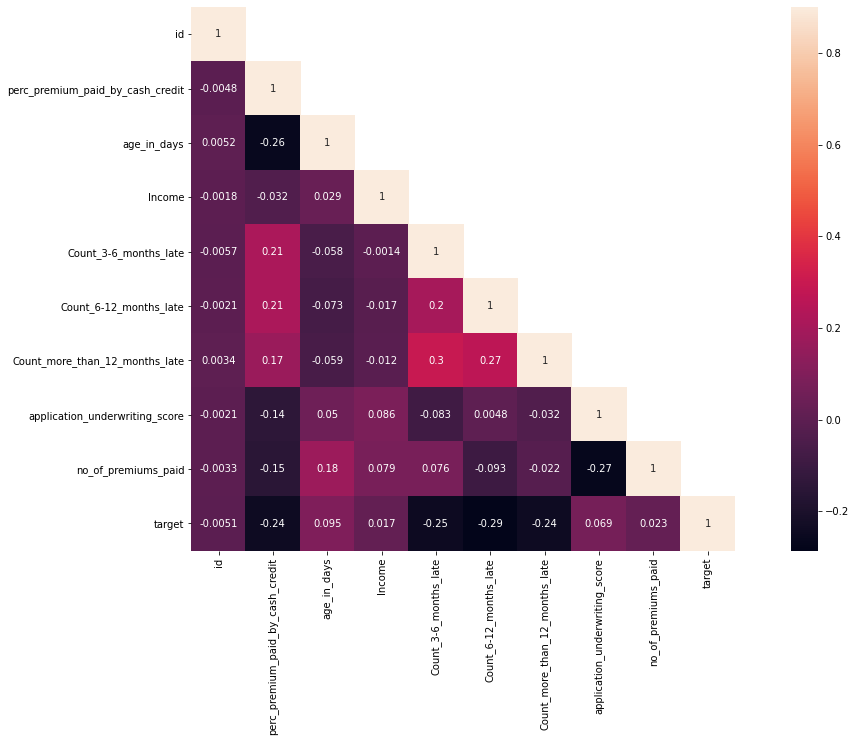

In [10]:
# looking at the correlation between numerical variables
corr = train[['id','perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'target']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


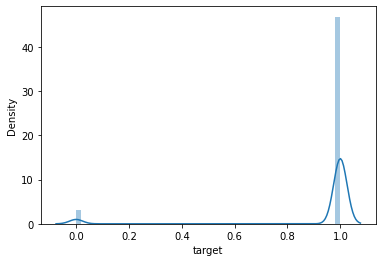

In [11]:
# distribution of count variable
sn.distplot(train["target"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


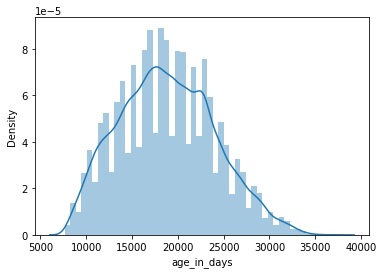

In [12]:
sn.distplot(train["age_in_days"])

In [13]:
#categorical-continuous varible bivariate analysis
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train['residence_area_type'], train['target']))


(0.2080863817891421,
 0.6482714305747836,
 1,
 array([[ 1982.22558952, 29687.77441048],
        [ 3015.77441048, 45167.22558952]]))

In [14]:
chi2_contingency(pd.crosstab(train['sourcing_channel'], train['target']))

(141.43673259821205,
 1.390061884429808e-29,
 4,
 array([[2.69975745e+03, 4.04342425e+04],
        [1.03348623e+03, 1.54785138e+04],
        [7.53521120e+02, 1.12854789e+04],
        [4.73117879e+02, 7.08588212e+03],
        [3.81173156e+01, 5.70882684e+02]]))

In [15]:
#treat missing values
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [16]:
train['Count_3-6_months_late'].fillna(train['Count_3-6_months_late'].median(), inplace=True)
train['Count_6-12_months_late'].fillna(train['Count_6-12_months_late'].median(), inplace=True)
train['Count_more_than_12_months_late'].fillna(train['Count_more_than_12_months_late'].median(), inplace=True)

In [17]:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].median(), inplace=True)

In [18]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


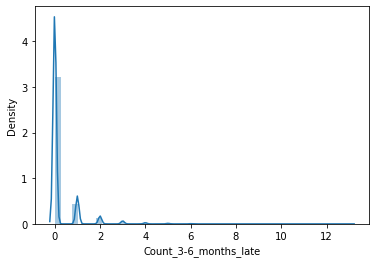

In [19]:
sn.distplot(train['Count_3-6_months_late'])

#**balancing train data set**


In [20]:
train["target"] = [float(str(i).replace("C", "")) for i in train["target"]]
train['target'] = [float(str(i).replace("Urban","")) for i in train['target']]

In [21]:
train.target.value_counts()

1.0    74855
0.0     4998
Name: target, dtype: int64

In [22]:
train = train.drop(["sourcing_channel"], axis=1)
train = train.drop(["id"], axis=1)

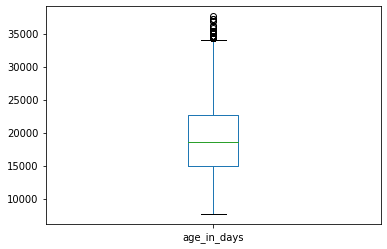

In [23]:
train['age_in_days'].plot.box()

In [24]:
train.loc[train['age_in_days']>34200, 'age_in_days'] = np.mean(train['age_in_days'])

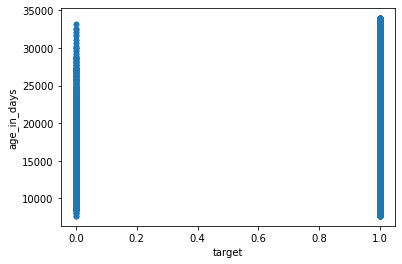

In [25]:
train.plot.scatter('target','age_in_days')

#**Balancing Test dataset**

In [26]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [54]:
test.drop(["id"], axis=1)
test.drop(["sourcing_channel"], axis=1)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,residence_area_type
0,649,0.001,27384.0,51150,0.0,0.0,0.0,99.89,7,Rural
1,81136,0.124,23735.0,285140,0.0,0.0,0.0,98.93,19,Urban
2,70762,1.000,17170.0,186030,0.0,0.0,0.0,99.21,2,Urban
3,53935,0.198,16068.0,123540,0.0,0.0,0.0,99.00,11,Rural
4,15476,0.041,10591.0,200020,1.0,0.0,0.0,99.17,14,Rural
...,...,...,...,...,...,...,...,...,...,...
34219,81988,0.227,20810.0,110240,0.0,0.0,0.0,97.52,9,Urban
34220,30326,0.157,19353.0,125090,0.0,0.0,0.0,99.62,7,Rural
34221,65749,0.325,18264.0,196570,0.0,0.0,0.0,98.58,14,Rural
34222,65686,0.983,16798.0,212150,1.0,0.0,1.0,98.88,10,Urban


In [28]:
test['Count_3-6_months_late'].fillna(test['Count_3-6_months_late'].median(), inplace=True)
test['Count_6-12_months_late'].fillna(test['Count_6-12_months_late'].median(), inplace=True)
test['Count_more_than_12_months_late'].fillna(test['Count_more_than_12_months_late'].median(), inplace=True)
test['application_underwriting_score'].fillna(test['application_underwriting_score'].median(), inplace=True)

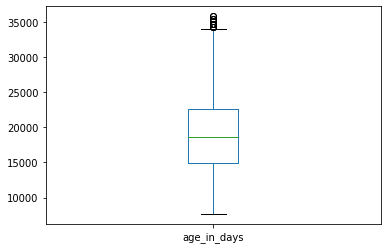

In [29]:
test['age_in_days'].plot.box()

In [30]:
test.loc[test['age_in_days']>34200, 'age_in_days'] = np.mean(test['age_in_days'])

#**Model Building**
##Logistic Regresion

In [31]:
#import scikit library for logistic regression
from sklearn.linear_model import LogisticRegression

In [33]:
x = train.drop("target", axis=1) #independent variables for train dataset 
y = train["target"] #dependeant variable
'''
x_test = test_part.drop("target",axis=1)  #independent variables  
p_true = test_part["target"]   #dependent variable
'''
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((63882, 9), (15971, 9), (63882,), (15971,))

In [35]:
x_train.columns, x_valid.columns

(Index(['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'residence_area_type'],
       dtype='object'),
 Index(['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'residence_area_type'],
       dtype='object'))

In [36]:
x_train = pd.get_dummies(x_train)

In [37]:
cat_cols=x_train.select_dtypes(include=['object']).columns.tolist()

In [38]:
cat_cols

[]

In [ ]:
#train_y.value_counts(), true_p.value_counts()

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
ct=ColumnTransformer([
    ('encode', OneHotEncoder(sparse=False,handle_unknown='ignore'),cat_cols)
])

In [40]:
#logistic regression object
logreg = LogisticRegression()

In [41]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
x_valid = pd.get_dummies(x_valid)

In [43]:
pred = logreg.predict(x_valid)

In [44]:
logreg.score(x_valid, y_valid)

0.938826623254649

In [45]:
logreg.score(x_train, y_train)

0.9370558216712063

In [46]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [47]:
rmsle(y_valid, pred)

0.171437840714521

##decision tree


In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dt_reg = DecisionTreeRegressor(max_depth=3,min_samples_leaf=6)

In [50]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [51]:
predict2 = dt_reg.predict(x_valid)

In [52]:
rmsle(y_valid, predict2)

0.1549330393871767

In [59]:
test.drop(['id', 'sourcing_channel'], axis=1, inplace=True)


In [65]:
test.columns

Index(['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'residence_area_type_Rural',
       'residence_area_type_Urban'],
      dtype='object')

In [64]:
test = pd.get_dummies(test)

In [66]:
test_pred = dt_reg.predict(test)

In [ ]:
#final_prediction = np.exp(predict2)

In [ ]:
#print(predict2[:300])

In [67]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Internshala+AV Project/sample_submission.csv')

In [68]:
sample_submission.shape, len(test_pred)

((34224, 2), 34224)

In [69]:
sample_submission['target'] = test_pred

In [70]:
sample_submission.to_csv("sample_submission.csv", header=True, index=False)

In [71]:
sample_submission.tail()

,id,target
34219,81988,0.975903
34220,30326,0.975903
34221,65749,0.975903
34222,65686,0.780617
34223,93826,0.975903


In [72]:
sample_submission.head()

,id,target
0,649,0.975903
1,81136,0.975903
2,70762,0.911224
3,53935,0.975903
4,15476,0.975903
